# Diccionario de variables del dataset Titanic

- **survival**: Survival (0 = No; 1 = Yes)
- **class**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name**: Name
- **sex**: Sex
- **age**: Age
- **sibsp**: Number of Siblings/Spouses Aboard
- **parch**: Number of Parents/Children Aboard
- **ticket**: Ticket Number
- **fare**: Passenger Fare
- **cabin**: Cabin
- **embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- **boat**: Lifeboat (if survived)
- **body**: Body number (if did not survive and body was recovered)


In [5]:
#Importaciones
import pandas as pd
import re

In [6]:
# Cargar los archivos train.csv y test.csv desde la carpeta local
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = train_df.copy()  # Usar train_df como base para limpieza

In [7]:
#Eliminar espacios antes y despues en strings
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [8]:
import re

# 🔹 Limpiar y separar los nombres en FirstName y LastName
def split_name(name):
    try:
        # Quitar comillas y caracteres especiales
        name = re.sub(r'["\'`]', '', name)         # quita comillas simples, dobles o invertidas
        name = re.sub(r'\s+', ' ', name).strip()   # quita espacios múltiples

        # Separar en apellido y resto
        last, rest = name.split(",", 1)
        last = last.strip()
        rest = rest.strip()

        # Si hay paréntesis, nombre real de mujer casada
        if "(" in rest:
            inside = re.findall(r"\((.*?)\)", rest)  # texto dentro de ()
            if inside:
                first = inside[0].strip()
                first = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚüÜñÑ\s-]', '', first)  # limpia caracteres no deseados
                return first, last

        # Caso normal, eliminar título (Mr., Mrs., Miss, etc.)
        if "." in rest:
            first = rest.split(".", 1)[1].strip()
        else:
            first = rest

        # Quitar caracteres no deseados (números, símbolos)
        first = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚüÜñÑ\s-]', '', first)
        last = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚüÜñÑ\s-]', '', last)

        return first, last
    except:
        return name, ""  # fallback

# Aplicar al dataset
df[['FirstName', 'LastName']] = df['Name'].apply(lambda x: pd.Series(split_name(x)))


In [9]:
#Imputar valores faltantes en Age con la mediana
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Age'] = df['Age'].round().astype(int)


C:\Users\Anonimo\AppData\Local\Temp\ipykernel_23304\3317440852.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
# Crear nuevas features antes de eliminar columnas
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 if 'SibSp' in df.columns and 'Parch' in df.columns else 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['HasCabin'] = (~df['Cabin'].isna()).astype(int) if 'Cabin' in df.columns else 0

#Eliminar columnas sin importancia
df.drop(columns=['PassengerId', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Name'], errors='ignore', inplace=True)

In [11]:
# Convertir los valores de Survived de 0/1 a 'no'/'si' en el dataset limpio
if 'Survived' in df.columns:
    df['Survived'] = df['Survived'].map({0: 'no', 1: 'si'})

In [12]:
# Dataset en vivo (primeras filas)
print("✅ Vista previa del dataset limpio:")
display(df.head(20))   # primeras 20 filas

# Guardar y descargar CSV limpio
clean_filename = "archivo_limpio_final.csv"
df.to_csv(clean_filename, index=False)

✅ Vista previa del dataset limpio:


,Survived,Pclass,Sex,Age,Fare,Embarked,FirstName,LastName,FamilySize,IsAlone,HasCabin
0,no,3,male,22,7.2500,S,Owen Harris,Braund,2,0,0
1,si,1,female,38,71.2833,C,Florence Briggs Thayer,Cumings,2,0,1
2,si,3,female,26,7.9250,S,Laina,Heikkinen,1,1,0
3,si,1,female,35,53.1000,S,Lily May Peel,Futrelle,2,0,1
4,no,3,male,35,8.0500,S,William Henry,Allen,1,1,0
5,no,3,male,28,8.4583,Q,James,Moran,1,1,0
6,no,1,male,54,51.8625,S,Timothy J,McCarthy,1,1,1
7,no,3,male,2,21.0750,S,Gosta Leonard,Palsson,5,0,0
8,si,3,female,27,11.1333,S,Elisabeth Vilhelmina Berg,Johnson,3,0,0
9,si,2,female,14,30.0708,C,Adele Achem,Nasser,2,0,0


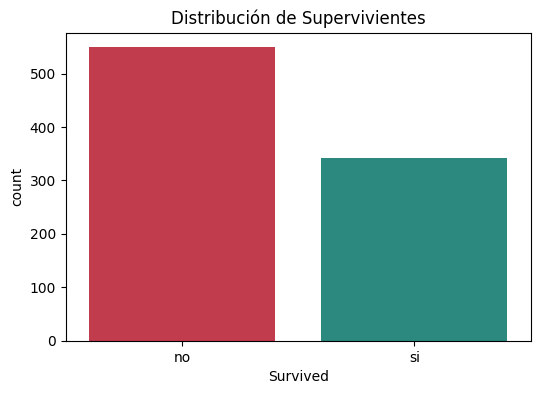

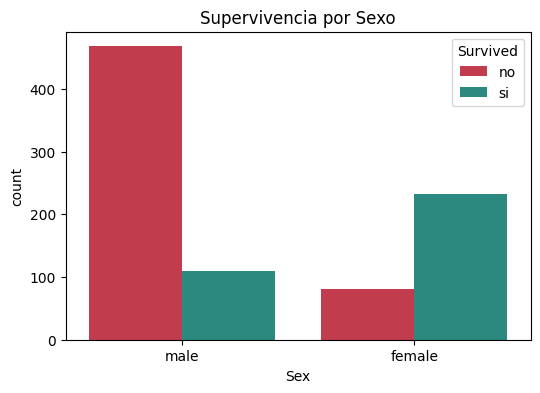

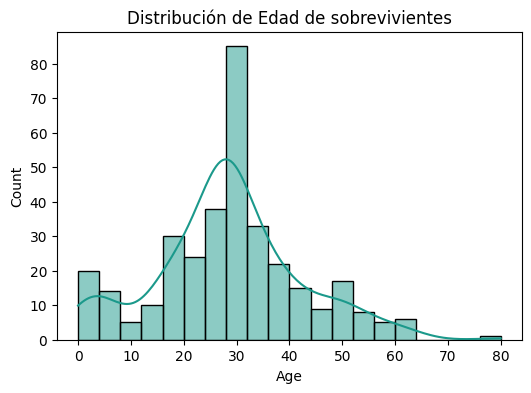

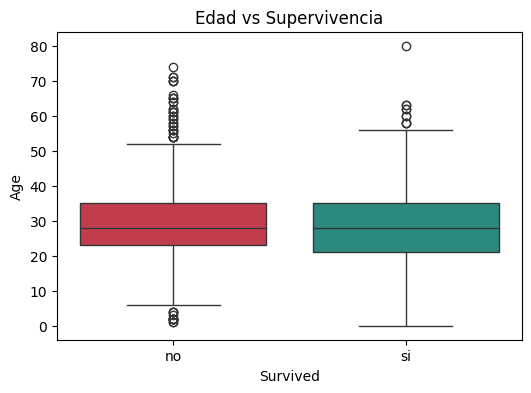

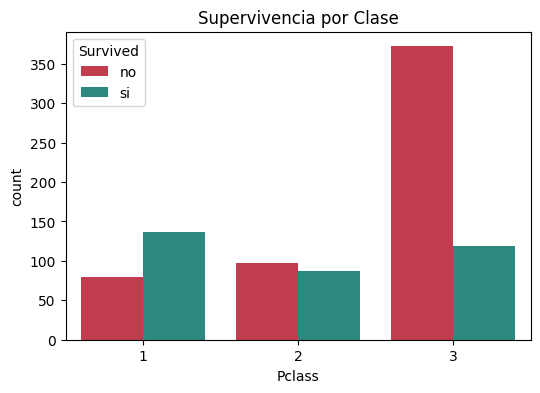

In [13]:
# Gráficas de exploración de datos con colores personalizados y etiquetas 'no'/'si' en Survived
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set2')  # Paleta general para todas las gráficas

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Survived', data=df, palette=['#d7263d','#1b998b'], legend=False, order=['no','si'], hue_order=['no','si'])
plt.title('Distribución de Supervivientes')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette=['#d7263d','#1b998b'], hue_order=['no','si'])
plt.title('Supervivencia por Sexo')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df[df['Survived'] == 'si']['Age'], bins=20, kde=True, color='#1b998b')
plt.title('Distribución de Edad de sobrevivientes')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, palette=['#d7263d','#1b998b'], legend=False, order=['no','si'], hue_order=['no','si'])
plt.title('Edad vs Supervivencia')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette=['#d7263d','#1b998b'], hue_order=['no','si'])
plt.title('Supervivencia por Clase')
plt.show()

In [14]:
# Crear nuevas features y evaluar cuál es la mejor para predecir la supervivencia
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Usar solo el dataset de entrenamiento limpio
X = df.drop(columns=['Survived'])
y = df['Survived']

# Lista de features a evaluar
features_to_test = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'HasCabin', 'FirstName', 'LastName']

# Convertir variables categóricas a numéricas
df_encoded = df.copy()
for col in ['Sex', 'Embarked', 'FirstName', 'LastName']:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

results = {}
for feature in features_to_test:
    if feature in df_encoded.columns:
        X_feat = df_encoded[[feature]].fillna(0)
        model = RandomForestClassifier(n_estimators=50, random_state=42)
        scores = cross_val_score(model, X_feat, y, cv=5, scoring='accuracy')
        results[feature] = np.mean(scores)

# Mostrar el mejor feature
best_feature = max(results, key=results.get)
print('Mejor feature para predecir Survived:', best_feature)
print('Accuracy promedio:', results[best_feature])
print('Resultados de cada feature:', results)

Mejor feature para predecir Survived: Sex
Accuracy promedio: 0.7867365513778168
Resultados de cada feature: {'Pclass': np.float64(0.6656142112861716), 'Sex': np.float64(0.7867365513778168), 'Age': np.float64(0.6071872449940368), 'Fare': np.float64(0.6969995606051096), 'Embarked': np.float64(0.6386667503609315), 'FamilySize': np.float64(0.6678676793672713), 'IsAlone': np.float64(0.6095160379135021), 'HasCabin': np.float64(0.6925177327223653), 'FirstName': np.float64(0.6543468708806729), 'LastName': np.float64(0.5656958131944009)}


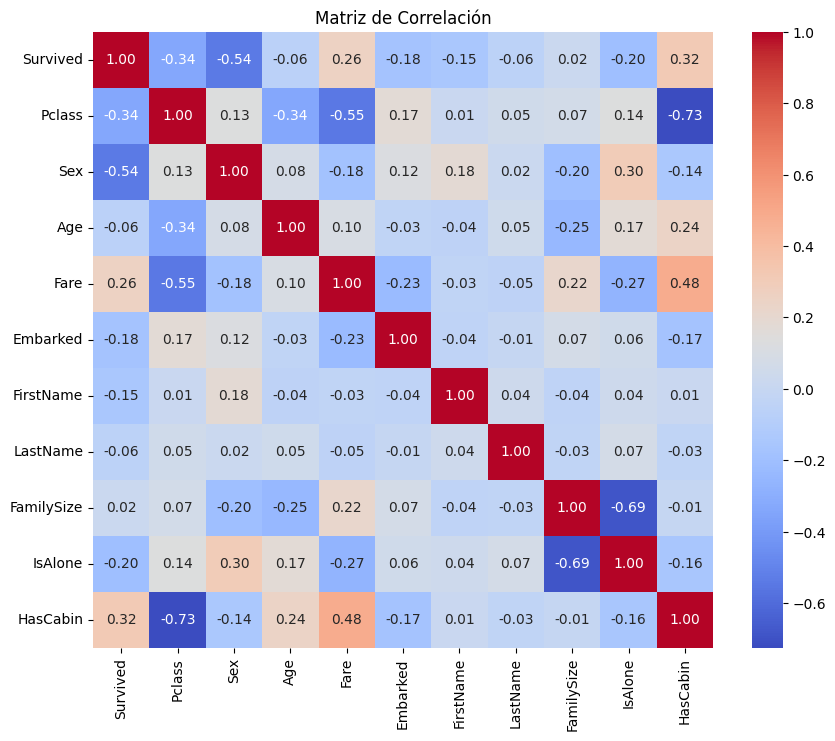

In [15]:
# Calcular matriz de correlación solo con columnas numéricas
df_corr = df_encoded.copy()
if 'Survived' in df_corr.columns:
    # Si Survived es string, conviértelo a 0/1
    if df_corr['Survived'].dtype == 'object':
        df_corr['Survived'] = df_corr['Survived'].map({'no': 0, 'si': 1})
corr_matrix = df_corr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

### Modelos

#### Random Forest

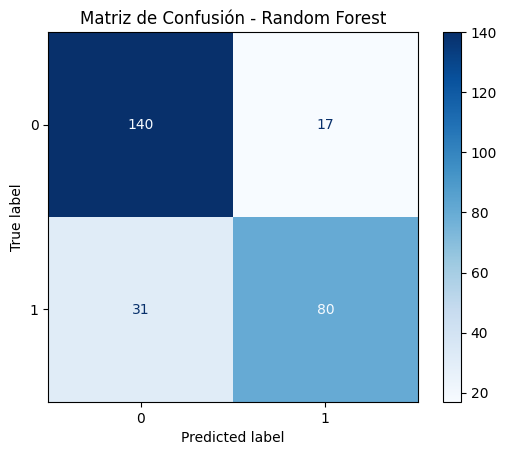

In [16]:
# Matriz de confusión usando RandomForest y train/test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preparar datos (usar solo features numéricos y categóricos codificados)
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'HasCabin', 'FirstName', 'LastName']
df_encoded = df.copy()
for col in ['Sex', 'Embarked', 'FirstName', 'LastName']:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

X = df_encoded[features].fillna(0)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

C:\Users\Anonimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


<Figure size 700x500 with 0 Axes>

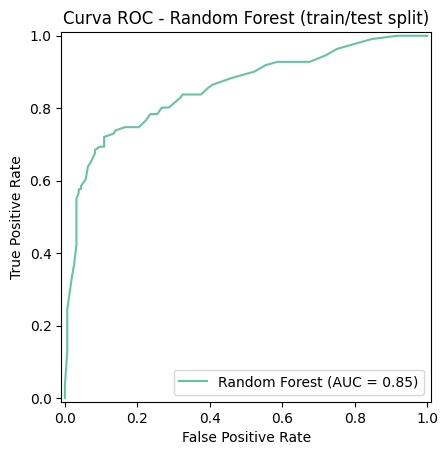

AUC: 0.8549664313995525
Accuracy en el test set: 0.8208955223880597
Precisión (precision) en el test set: 0.8247422680412371
Recall en el test set: 0.7207207207207207


In [17]:
# Curva ROC y métricas para Random Forest (train/test split)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_score, recall_score, accuracy_score

# Si y_test es string ('no'/'si'), convertir a 0/1
if y_test.dtype == 'object':
    y_test_bin = y_test.map({'no': 0, 'si': 1})
else:
    y_test_bin = y_test

# Obtener probabilidades para la clase positiva
y_proba = model.predict_proba(X_test)[:, 1]

# Predicciones binarias
y_pred = model.predict(X_test)
if isinstance(y_pred[0], str):
    y_pred_bin = pd.Series(y_pred).map({'no': 0, 'si': 1}).values
else:
    y_pred_bin = y_pred

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot()
plt.title('Curva ROC - Random Forest (train/test split)')
plt.show()
print(f'AUC: {roc_auc}')

# Calcular y mostrar la precisión (accuracy)
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print(f'Accuracy en el test set: {accuracy}')

# Calcular y mostrar la precisión (precision)
precision = precision_score(y_test_bin, y_pred_bin)
print(f'Precisión (precision) en el test set: {precision}')

# Calcular y mostrar el recall
recall = recall_score(y_test_bin, y_pred_bin)
print(f'Recall en el test set: {recall}')

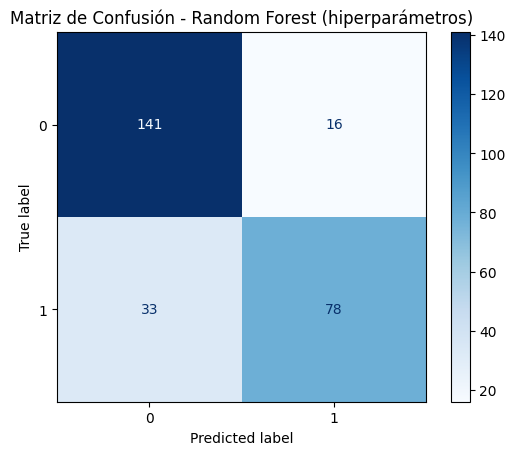

In [18]:
# Matriz de confusión usando RandomForest con hiperparámetros y train/test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'HasCabin', 'FirstName', 'LastName']
df_encoded_hp = df.copy()
for col in ['Sex', 'Embarked', 'FirstName', 'LastName']:
    if col in df_encoded_hp.columns:
        df_encoded_hp[col] = df_encoded_hp[col].astype('category').cat.codes
X_hp = df_encoded_hp[features].fillna(0)
y_hp = df_encoded_hp['Survived']
X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X_hp, y_hp, test_size=0.3, random_state=42)
model_hp = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=3, max_features='sqrt', random_state=42)
model_hp.fit(X_train_hp, y_train_hp)
y_pred_hp = model_hp.predict(X_test_hp)
cm_hp = confusion_matrix(y_test_hp, y_pred_hp)
disp_hp = ConfusionMatrixDisplay(confusion_matrix=cm_hp)
disp_hp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Random Forest (hiperparámetros)')
plt.show()

C:\Users\Anonimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


<Figure size 700x500 with 0 Axes>

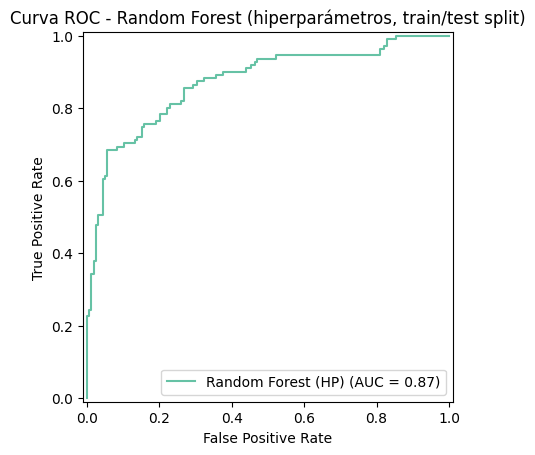

AUC: 0.8716933494003558
Accuracy en el test set (hiperparámetros): 0.8171641791044776
Precisión (precision) en el test set (hiperparámetros): 0.8297872340425532
Recall en el test set (hiperparámetros): 0.7027027027027027


In [19]:
# Curva ROC y métricas para Random Forest (hiperparámetros, train/test split)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_score, recall_score, accuracy_score

# Si y_test_hp es string ('no'/'si'), convertir a 0/1
if y_test_hp.dtype == 'object':
    y_test_hp_bin = y_test_hp.map({'no': 0, 'si': 1})
else:
    y_test_hp_bin = y_test_hp

# Obtener probabilidades para la clase positiva
y_proba_hp = model_hp.predict_proba(X_test_hp)[:, 1]

# Predicciones binarias
y_pred_hp = model_hp.predict(X_test_hp)
if isinstance(y_pred_hp[0], str):
    y_pred_hp_bin = pd.Series(y_pred_hp).map({'no': 0, 'si': 1}).values
else:
    y_pred_hp_bin = y_pred_hp

# Curva ROC y AUC
fpr_hp, tpr_hp, thresholds_hp = roc_curve(y_test_hp_bin, y_proba_hp)
roc_auc_hp = auc(fpr_hp, tpr_hp)

plt.figure(figsize=(7,5))
RocCurveDisplay(fpr=fpr_hp, tpr=tpr_hp, roc_auc=roc_auc_hp, estimator_name='Random Forest (HP)').plot()
plt.title('Curva ROC - Random Forest (hiperparámetros, train/test split)')
plt.show()
print(f'AUC: {roc_auc_hp}')

# Calcular y mostrar la precisión (accuracy)
accuracy_hp = accuracy_score(y_test_hp_bin, y_pred_hp_bin)
print(f'Accuracy en el test set (hiperparámetros): {accuracy_hp}')

# Calcular y mostrar la precisión (precision)
precision_hp = precision_score(y_test_hp_bin, y_pred_hp_bin)
print(f'Precisión (precision) en el test set (hiperparámetros): {precision_hp}')

# Calcular y mostrar el recall
recall_hp = recall_score(y_test_hp_bin, y_pred_hp_bin)
print(f'Recall en el test set (hiperparámetros): {recall_hp}')

#### SVM

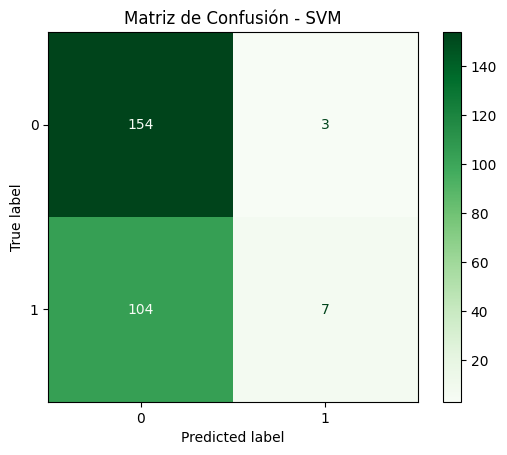

In [20]:
# Modelo SVM (Support Vector Machine) para comparación
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Entrenar SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Matriz de confusión SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Greens')
plt.title('Matriz de Confusión - SVM')
plt.show()

C:\Users\Anonimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


<Figure size 700x500 with 0 Axes>

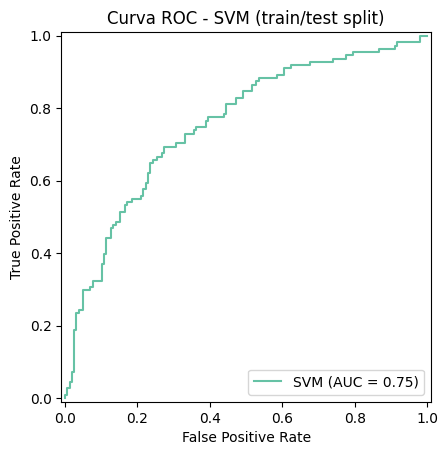

AUC: 0.7548631433981753
Accuracy en el test set (SVM): 0.6007462686567164
Precisión (precision) en el test set (SVM): 0.7
Recall en el test set (SVM): 0.06306306306306306


In [21]:
# Curva ROC y métricas para SVM (train/test split)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_score, recall_score, accuracy_score

# Si y_test es string ('no'/'si'), convertir a 0/1
if y_test.dtype == 'object':
    y_test_bin = y_test.map({'no': 0, 'si': 1})
else:
    y_test_bin = y_test

# Obtener probabilidades para la clase positiva (decision_function para SVM)
if hasattr(svm_model, 'decision_function'):
    y_scores = svm_model.decision_function(X_test)
else:
    y_scores = svm_model.predict_proba(X_test)[:, 1]

# Predicciones binarias
y_pred_svm = svm_model.predict(X_test)
if isinstance(y_pred_svm[0], str):
    y_pred_svm_bin = pd.Series(y_pred_svm).map({'no': 0, 'si': 1}).values
else:
    y_pred_svm_bin = y_pred_svm

# Curva ROC y AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_bin, y_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(7,5))
RocCurveDisplay(fpr=fpr_svm, tpr=tpr_svm, roc_auc=roc_auc_svm, estimator_name='SVM').plot()
plt.title('Curva ROC - SVM (train/test split)')
plt.show()
print(f'AUC: {roc_auc_svm}')

# Calcular y mostrar la precisión (accuracy)
accuracy_svm = accuracy_score(y_test_bin, y_pred_svm_bin)
print(f'Accuracy en el test set (SVM): {accuracy_svm}')

# Calcular y mostrar la precisión (precision)
precision_svm = precision_score(y_test_bin, y_pred_svm_bin)
print(f'Precisión (precision) en el test set (SVM): {precision_svm}')

# Calcular y mostrar el recall
recall_svm = recall_score(y_test_bin, y_pred_svm_bin)
print(f'Recall en el test set (SVM): {recall_svm}')

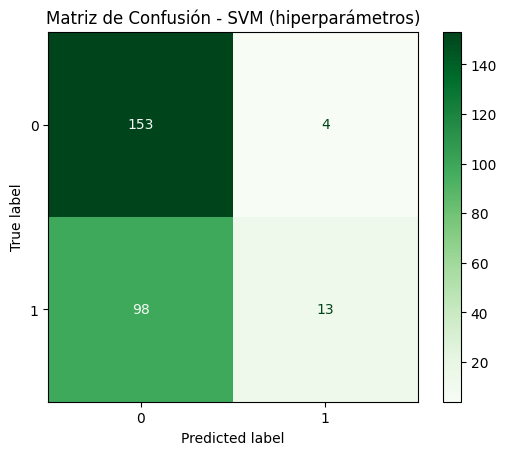

In [22]:
# Matriz de confusión usando SVM con hiperparámetros y train/test split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
model_svm_hp = SVC(kernel='rbf', C=2, gamma='scale', random_state=42)
model_svm_hp.fit(X_train_hp, y_train_hp)
y_pred_svm_hp = model_svm_hp.predict(X_test_hp)
cm_svm_hp = confusion_matrix(y_test_hp, y_pred_svm_hp)
disp_svm_hp = ConfusionMatrixDisplay(confusion_matrix=cm_svm_hp)
disp_svm_hp.plot(cmap='Greens')
plt.title('Matriz de Confusión - SVM (hiperparámetros)')
plt.show()

C:\Users\Anonimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


<Figure size 700x500 with 0 Axes>

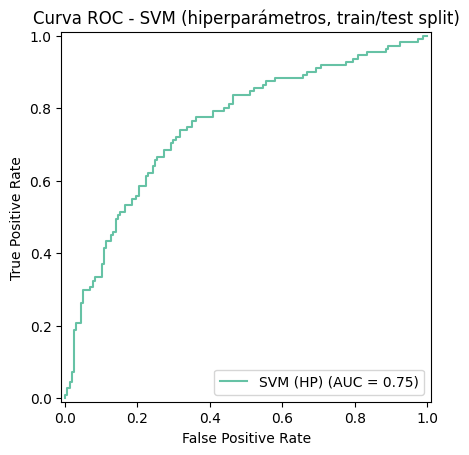

AUC: 0.7519366500258218
Accuracy en el test set (SVM, hiperparámetros): 0.6194029850746269
Precisión (precision) en el test set (SVM, hiperparámetros): 0.7647058823529411
Recall en el test set (SVM, hiperparámetros): 0.11711711711711711


In [23]:
# Curva ROC y métricas para SVM (hiperparámetros, train/test split)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_score, recall_score, accuracy_score

# Si y_test_hp es string ('no'/'si'), convertir a 0/1
if y_test_hp.dtype == 'object':
    y_test_hp_bin = y_test_hp.map({'no': 0, 'si': 1})
else:
    y_test_hp_bin = y_test_hp

# Obtener probabilidades para la clase positiva (decision_function para SVM)
if hasattr(model_svm_hp, 'decision_function'):
    y_scores_hp = model_svm_hp.decision_function(X_test_hp)
else:
    y_scores_hp = model_svm_hp.predict_proba(X_test_hp)[:, 1]

# Predicciones binarias
y_pred_svm_hp = model_svm_hp.predict(X_test_hp)
if isinstance(y_pred_svm_hp[0], str):
    y_pred_svm_hp_bin = pd.Series(y_pred_svm_hp).map({'no': 0, 'si': 1}).values
else:
    y_pred_svm_hp_bin = y_pred_svm_hp

# Curva ROC y AUC
fpr_svm_hp, tpr_svm_hp, thresholds_svm_hp = roc_curve(y_test_hp_bin, y_scores_hp)
roc_auc_svm_hp = auc(fpr_svm_hp, tpr_svm_hp)

plt.figure(figsize=(7,5))
RocCurveDisplay(fpr=fpr_svm_hp, tpr=tpr_svm_hp, roc_auc=roc_auc_svm_hp, estimator_name='SVM (HP)').plot()
plt.title('Curva ROC - SVM (hiperparámetros, train/test split)')
plt.show()
print(f'AUC: {roc_auc_svm_hp}')

# Calcular y mostrar la precisión (accuracy)
accuracy_svm_hp = accuracy_score(y_test_hp_bin, y_pred_svm_hp_bin)
print(f'Accuracy en el test set (SVM, hiperparámetros): {accuracy_svm_hp}')

# Calcular y mostrar la precisión (precision)
precision_svm_hp = precision_score(y_test_hp_bin, y_pred_svm_hp_bin)
print(f'Precisión (precision) en el test set (SVM, hiperparámetros): {precision_svm_hp}')

# Calcular y mostrar el recall
recall_svm_hp = recall_score(y_test_hp_bin, y_pred_svm_hp_bin)
print(f'Recall en el test set (SVM, hiperparámetros): {recall_svm_hp}')

#### Decision Tree

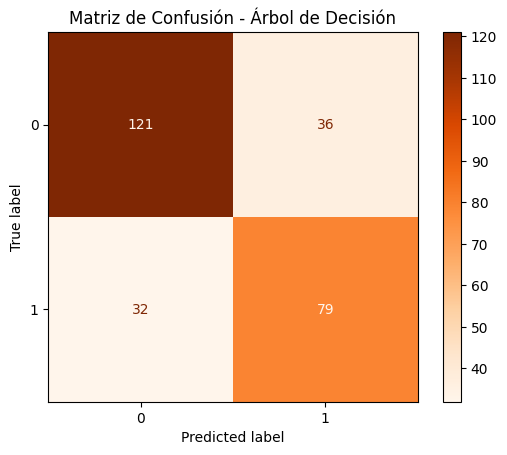

In [24]:
# Árbol de Decisión para comparación
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Entrenar Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Matriz de confusión Árbol de Decisión
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot(cmap='Oranges')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

C:\Users\Anonimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


<Figure size 700x500 with 0 Axes>

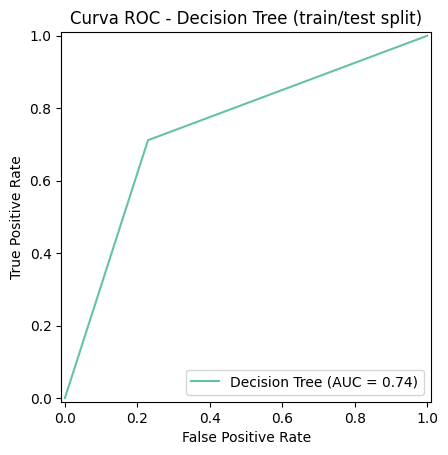

AUC: 0.7412061743271934
Accuracy en el test set (Decision Tree): 0.746268656716418
Precisión (precision) en el test set (Decision Tree): 0.6869565217391305
Recall en el test set (Decision Tree): 0.7117117117117117


In [25]:
# Curva ROC y métricas para Decision Tree (train/test split)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_score, recall_score, accuracy_score

# Si y_test es string ('no'/'si'), convertir a 0/1
if y_test.dtype == 'object':
    y_test_tree_bin = y_test.map({'no': 0, 'si': 1})
else:
    y_test_tree_bin = y_test

# Obtener probabilidades para la clase positiva
if hasattr(tree_model, 'predict_proba'):
    y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
else:
    y_proba_tree = tree_model.predict(X_test)

# Predicciones binarias
y_pred_tree = tree_model.predict(X_test)
if isinstance(y_pred_tree[0], str):
    y_pred_tree_bin = pd.Series(y_pred_tree).map({'no': 0, 'si': 1}).values
else:
    y_pred_tree_bin = y_pred_tree

# Curva ROC y AUC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test_tree_bin, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(7,5))
RocCurveDisplay(fpr=fpr_tree, tpr=tpr_tree, roc_auc=roc_auc_tree, estimator_name='Decision Tree').plot()
plt.title('Curva ROC - Decision Tree (train/test split)')
plt.show()
print(f'AUC: {roc_auc_tree}')

# Calcular y mostrar la precisión (accuracy)
accuracy_tree = accuracy_score(y_test_tree_bin, y_pred_tree_bin)
print(f'Accuracy en el test set (Decision Tree): {accuracy_tree}')

# Calcular y mostrar la precisión (precision)
precision_tree = precision_score(y_test_tree_bin, y_pred_tree_bin)
print(f'Precisión (precision) en el test set (Decision Tree): {precision_tree}')

# Calcular y mostrar el recall
recall_tree = recall_score(y_test_tree_bin, y_pred_tree_bin)
print(f'Recall en el test set (Decision Tree): {recall_tree}')

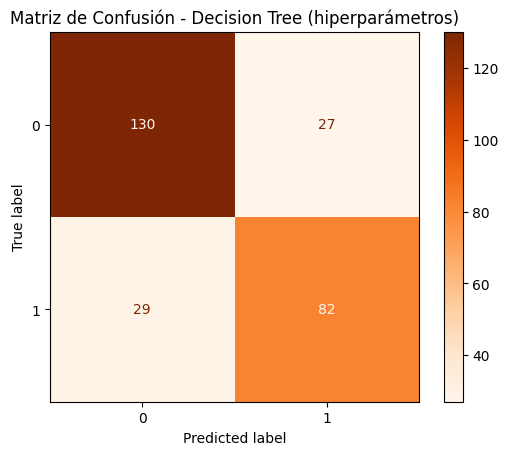

In [26]:
# Matriz de confusión usando Decision Tree con hiperparámetros y train/test split
from sklearn.tree import DecisionTreeClassifier
model_tree_hp = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=42)
model_tree_hp.fit(X_train_hp, y_train_hp)
y_pred_tree_hp = model_tree_hp.predict(X_test_hp)
cm_tree_hp = confusion_matrix(y_test_hp, y_pred_tree_hp)
disp_tree_hp = ConfusionMatrixDisplay(confusion_matrix=cm_tree_hp)
disp_tree_hp.plot(cmap='Oranges')
plt.title('Matriz de Confusión - Decision Tree (hiperparámetros)')
plt.show()

C:\Users\Anonimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


<Figure size 700x500 with 0 Axes>

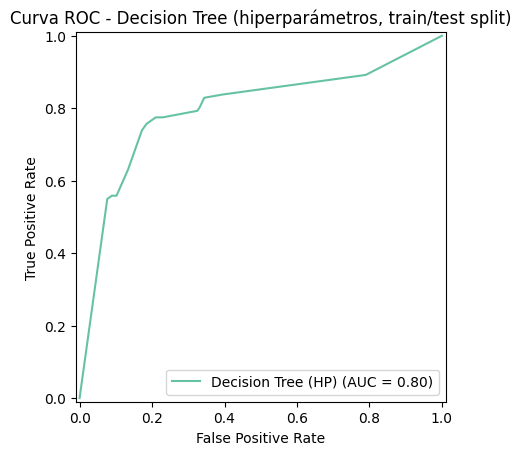

AUC: 0.7972972972972974
Accuracy en el test set (Decision Tree, hiperparámetros): 0.7910447761194029
Precisión (precision) en el test set (Decision Tree, hiperparámetros): 0.7522935779816514
Recall en el test set (Decision Tree, hiperparámetros): 0.7387387387387387


In [27]:
# Curva ROC y métricas para Decision Tree (hiperparámetros, train/test split)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_score, recall_score, accuracy_score

# Si y_test_hp es string ('no'/'si'), convertir a 0/1
if y_test_hp.dtype == 'object':
    y_test_tree_hp_bin = y_test_hp.map({'no': 0, 'si': 1})
else:
    y_test_tree_hp_bin = y_test_hp

# Obtener probabilidades para la clase positiva
if hasattr(model_tree_hp, 'predict_proba'):
    y_proba_tree_hp = model_tree_hp.predict_proba(X_test_hp)[:, 1]
else:
    y_proba_tree_hp = model_tree_hp.predict(X_test_hp)

# Predicciones binarias
y_pred_tree_hp = model_tree_hp.predict(X_test_hp)
if isinstance(y_pred_tree_hp[0], str):
    y_pred_tree_hp_bin = pd.Series(y_pred_tree_hp).map({'no': 0, 'si': 1}).values
else:
    y_pred_tree_hp_bin = y_pred_tree_hp

# Curva ROC y AUC
fpr_tree_hp, tpr_tree_hp, thresholds_tree_hp = roc_curve(y_test_tree_hp_bin, y_proba_tree_hp)
roc_auc_tree_hp = auc(fpr_tree_hp, tpr_tree_hp)

plt.figure(figsize=(7,5))
RocCurveDisplay(fpr=fpr_tree_hp, tpr=tpr_tree_hp, roc_auc=roc_auc_tree_hp, estimator_name='Decision Tree (HP)').plot()
plt.title('Curva ROC - Decision Tree (hiperparámetros, train/test split)')
plt.show()
print(f'AUC: {roc_auc_tree_hp}')

# Calcular y mostrar la precisión (accuracy)
accuracy_tree_hp = accuracy_score(y_test_tree_hp_bin, y_pred_tree_hp_bin)
print(f'Accuracy en el test set (Decision Tree, hiperparámetros): {accuracy_tree_hp}')

# Calcular y mostrar la precisión (precision)
precision_tree_hp = precision_score(y_test_tree_hp_bin, y_pred_tree_hp_bin)
print(f'Precisión (precision) en el test set (Decision Tree, hiperparámetros): {precision_tree_hp}')

# Calcular y mostrar el recall
recall_tree_hp = recall_score(y_test_tree_hp_bin, y_pred_tree_hp_bin)
print(f'Recall en el test set (Decision Tree, hiperparámetros): {recall_tree_hp}')

### Comparación

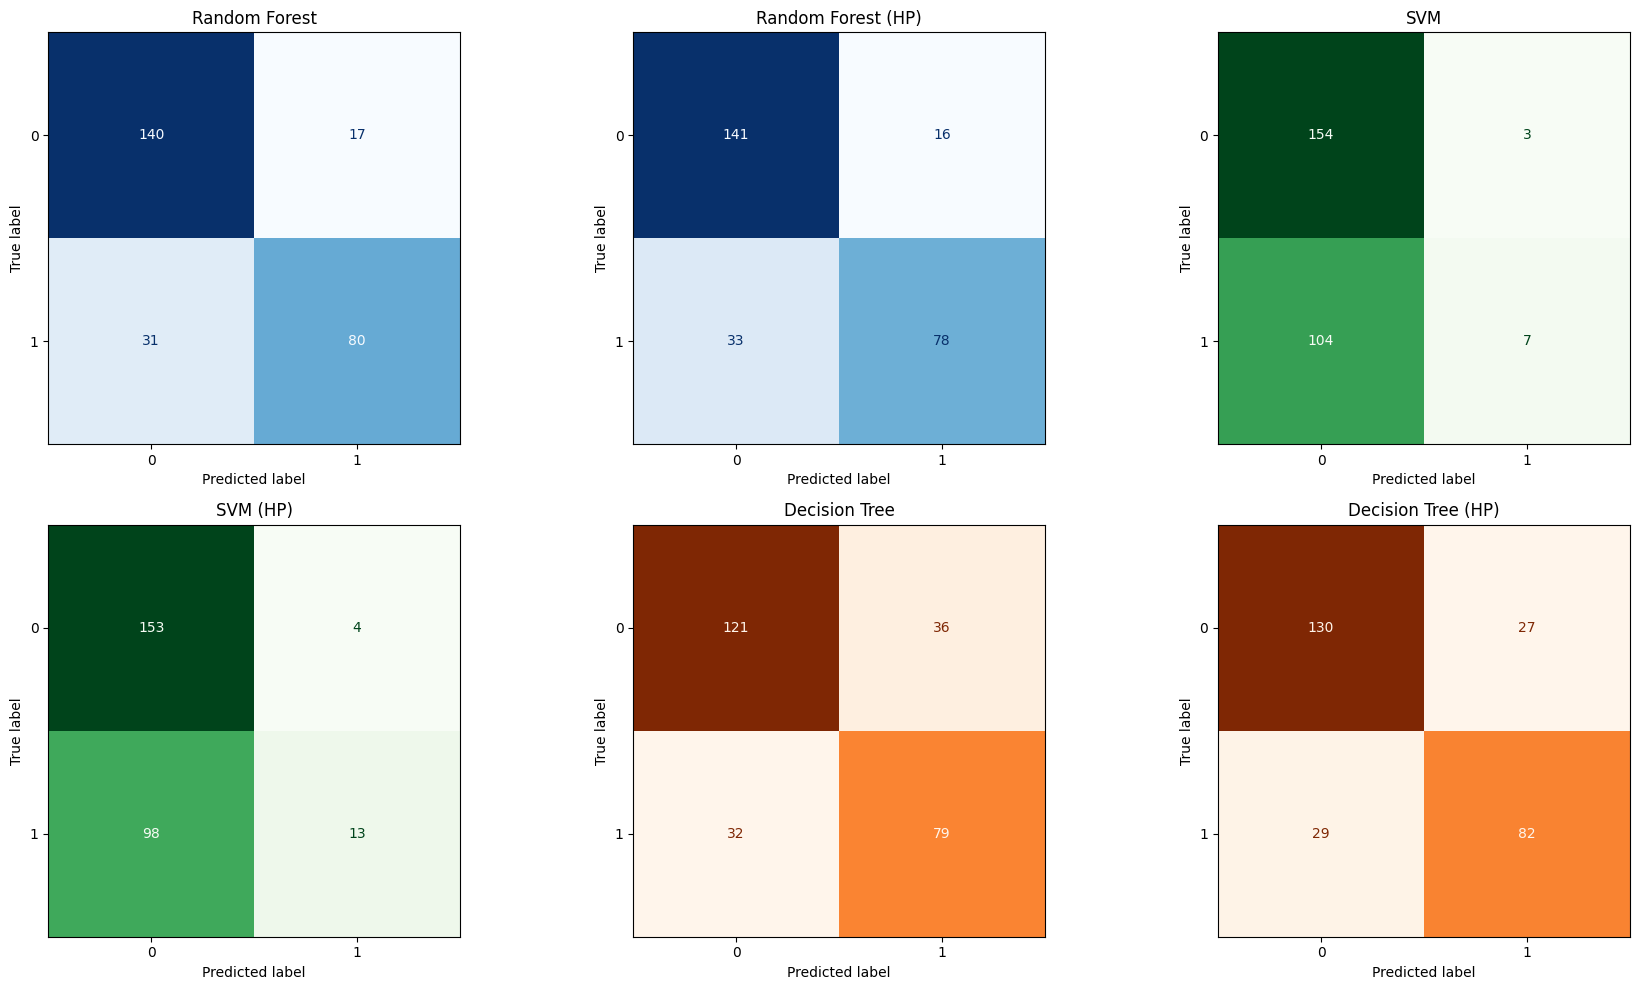

In [28]:
# Comparación visual de las matrices de confusión de todos los modelos en subplots
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
model_names = [
    'Random Forest',
    'Random Forest (HP)',
    'SVM',
    'SVM (HP)',
    'Decision Tree',
    'Decision Tree (HP)'
 ]
cms = [
    cm,
    cm_hp,
    cm_svm,
    cm_svm_hp,
    cm_tree,
    cm_tree_hp
 ]
cmaps = ['Blues', 'Blues', 'Greens', 'Greens', 'Oranges', 'Oranges']
for i, ax in enumerate(axes.flat):
    disp = ConfusionMatrixDisplay(confusion_matrix=cms[i])
    disp.plot(ax=ax, cmap=cmaps[i], colorbar=False)
    ax.set_title(model_names[i])
plt.tight_layout()
plt.show()

C:\Users\Anonimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


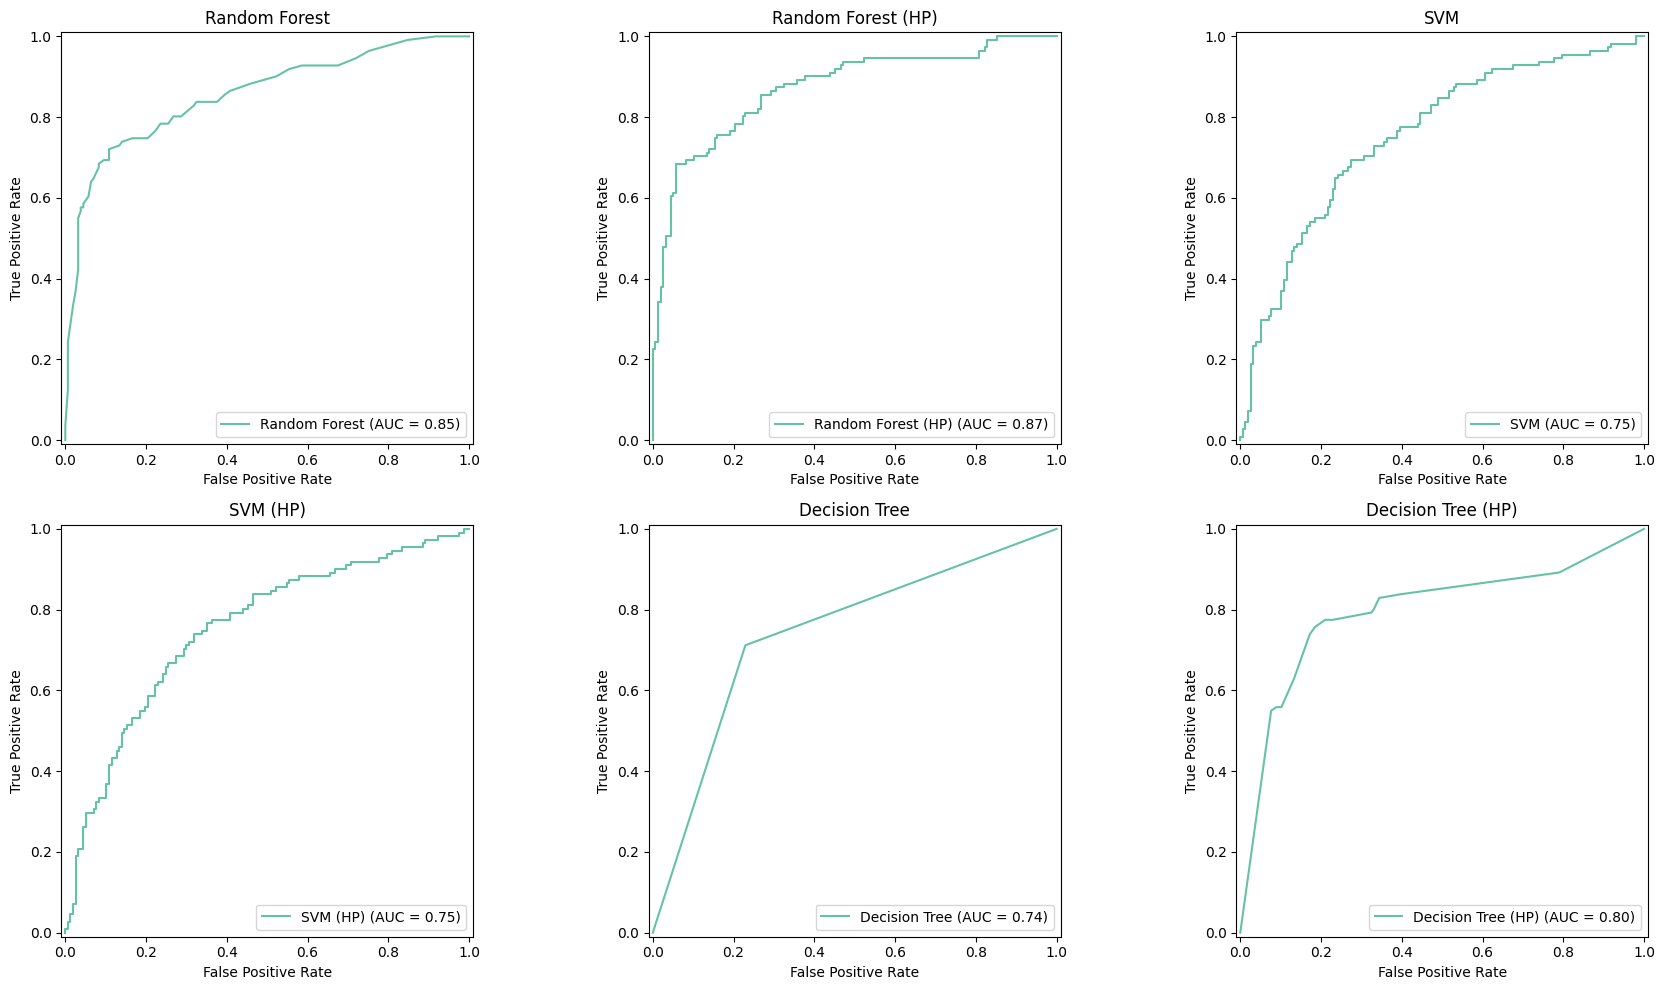

In [29]:
# Comparación visual de las curvas ROC de todos los modelos en subplots
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
model_names = [
    'Random Forest',
    'Random Forest (HP)',
    'SVM',
    'SVM (HP)',
    'Decision Tree',
    'Decision Tree (HP)'
 ]
roc_data = [
    (fpr, tpr, roc_auc),
    (fpr_hp, tpr_hp, roc_auc_hp),
    (fpr_svm, tpr_svm, roc_auc_svm),
    (fpr_svm_hp, tpr_svm_hp, roc_auc_svm_hp),
    (fpr_tree, tpr_tree, roc_auc_tree),
    (fpr_tree_hp, tpr_tree_hp, roc_auc_tree_hp)
 ]
for i, ax in enumerate(axes.flat):
    fpr, tpr, auc_val = roc_data[i]
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_val, estimator_name=model_names[i]).plot(ax=ax)
    ax.set_title(model_names[i])
plt.tight_layout()
plt.show()

In [30]:
# Tabla comparativa de Accuracy, Precision, Recall y AUC de todos los modelos estándar y con hiperparámetros
import pandas as pd
comparacion_metricas = {
    'Modelo': [
        'Random Forest',
        'Random Forest (HP)',
        'SVM',
        'SVM (HP)',
        'Decision Tree',
        'Decision Tree (HP)'
    ],
    'Accuracy': [
        accuracy,
        accuracy_hp,
        accuracy_svm,
        accuracy_svm_hp,
        accuracy_tree,
        accuracy_tree_hp
    ],
    'Precision': [
        precision,
        precision_hp,
        precision_svm,
        precision_svm_hp,
        precision_tree,
        precision_tree_hp
    ],
    'Recall': [
        recall,
        recall_hp,
        recall_svm,
        recall_svm_hp,
        recall_tree,
        recall_tree_hp
    ],
    'AUC': [
        roc_auc,
        roc_auc_hp,
        roc_auc_svm,
        roc_auc_svm_hp,
        roc_auc_tree,
        roc_auc_tree_hp
    ]
}
df_comparacion_metricas = pd.DataFrame(comparacion_metricas)
print(df_comparacion_metricas)

               Modelo  Accuracy  Precision    Recall       AUC
0       Random Forest  0.820896   0.824742  0.720721  0.854966
1  Random Forest (HP)  0.817164   0.829787  0.702703  0.871693
2                 SVM  0.600746   0.700000  0.063063  0.754863
3            SVM (HP)  0.619403   0.764706  0.117117  0.751937
4       Decision Tree  0.746269   0.686957  0.711712  0.741206
5  Decision Tree (HP)  0.791045   0.752294  0.738739  0.797297


In [31]:
# KFold cross-validation (cv=5) y tabla comparativa de accuracy para todos los modelos
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
kf = KFold(n_splits=5, shuffle=True, random_state=42)
modelos = [
    RandomForestClassifier(n_estimators=50, random_state=42),
    RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=3, max_features='sqrt', random_state=42),
    SVC(kernel='rbf', random_state=42),
    SVC(kernel='rbf', C=2, gamma='scale', random_state=42),
    DecisionTreeClassifier(random_state=42),
    DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=42)
 ]
model_names = [
    'Random Forest',
    'Random Forest (HP)',
    'SVM',
    'SVM (HP)',
    'Decision Tree',
    'Decision Tree (HP)'
 ]
X_kfold = X
y_kfold = y
resultados = []
for modelo, nombre in zip(modelos, model_names):
    scores = cross_val_score(modelo, X_kfold, y_kfold, cv=kf, scoring='accuracy')
    resultados.append({
        'Modelo': nombre,
        'Accuracy Media': scores.mean(),
        'Accuracy Std': scores.std()
    })
df_kfold_comparacion = pd.DataFrame(resultados)
print(df_kfold_comparacion)

               Modelo  Accuracy Media  Accuracy Std
0       Random Forest        0.831643      0.023615
1  Random Forest (HP)        0.829427      0.033318
2                 SVM        0.636413      0.022224
3            SVM (HP)        0.656600      0.015603
4       Decision Tree        0.759814      0.021790
5  Decision Tree (HP)        0.799115      0.023013


## Kmeans

In [32]:
# KMeans clustering sobre el dataset limpio
from sklearn.cluster import KMeans
import numpy as np

# Seleccionar solo columnas numéricas para KMeans
df_kmeans = df_encoded.copy()
if 'Survived' in df_kmeans.columns and df_kmeans['Survived'].dtype == 'object':
    df_kmeans['Survived'] = df_kmeans['Survived'].map({'no': 0, 'si': 1})
num_cols = df_kmeans.select_dtypes(include=[np.number]).columns.tolist()
X_kmeans = df_kmeans[num_cols].fillna(0)

# Aplicar KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_kmeans['Cluster'] = kmeans.fit_predict(X_kmeans)

print('Conteo de elementos por cluster:')
print(df_kmeans['Cluster'].value_counts())

Conteo de elementos por cluster:
Cluster
1    244
3    224
2    214
0    209
Name: count, dtype: int64


In [33]:
# Asignar nombres diferenciados a los clusters usando rangos y más variables
import numpy as np
num_cols = df_kmeans.select_dtypes(include=['number']).columns.tolist()
cluster_means = df_kmeans.groupby('Cluster')[num_cols].mean()
cluster_names = {}
fare_terciles = np.percentile(cluster_means['Fare'], [33, 66])
age_terciles = np.percentile(cluster_means['Age'], [33, 66])
for idx, row in cluster_means.iterrows():
    name_parts = []
    # Edad
    if row['Age'] < age_terciles[0]:
        name_parts.append('Muy Jóvenes')
    elif row['Age'] < age_terciles[1]:
        name_parts.append('Jóvenes')
    else:
        name_parts.append('Adultos')
    # Clase
    if row['Pclass'] == 1:
        name_parts.append('Primera Clase')
    elif row['Pclass'] == 2:
        name_parts.append('Segunda Clase')
    else:
        name_parts.append('Tercera Clase')
    # Tarifa
    if row['Fare'] < fare_terciles[0]:
        name_parts.append('Tarifa Baja')
    elif row['Fare'] < fare_terciles[1]:
        name_parts.append('Tarifa Media')
    else:
        name_parts.append('Tarifa Alta')
    # Tamaño familiar
    if row.get('FamilySize', 0) >= 4:
        name_parts.append('Familia Grande')
    elif row.get('FamilySize', 0) >= 2:
        name_parts.append('Familia Mediana')
    else:
        name_parts.append('Sin Familia')
    name = ' | '.join(name_parts)
    cluster_names[idx] = name
print('Nombres diferenciados asignados a los clusters:')
for k, v in cluster_names.items():
    print(f'Cluster {k}: {v}')

# Agregar columna con nombre de cluster diferenciado
df_kmeans['ClusterNameDiff'] = df_kmeans['Cluster'].map(cluster_names)
print(df_kmeans[['Cluster', 'ClusterNameDiff']].head(10))

Nombres diferenciados asignados a los clusters:
Cluster 0: Adultos | Tercera Clase | Tarifa Media | Familia Mediana
Cluster 1: Adultos | Tercera Clase | Tarifa Alta | Sin Familia
Cluster 2: Muy Jóvenes | Tercera Clase | Tarifa Baja | Sin Familia
Cluster 3: Jóvenes | Tercera Clase | Tarifa Alta | Sin Familia
   Cluster                                    ClusterNameDiff
0        3  Jóvenes | Tercera Clase | Tarifa Alta | Sin Fa...
1        1  Adultos | Tercera Clase | Tarifa Alta | Sin Fa...
2        3  Jóvenes | Tercera Clase | Tarifa Alta | Sin Fa...
3        3  Jóvenes | Tercera Clase | Tarifa Alta | Sin Fa...
4        3  Jóvenes | Tercera Clase | Tarifa Alta | Sin Fa...
5        0  Adultos | Tercera Clase | Tarifa Media | Famil...
6        2  Muy Jóvenes | Tercera Clase | Tarifa Baja | Si...
7        0  Adultos | Tercera Clase | Tarifa Media | Famil...
8        1  Adultos | Tercera Clase | Tarifa Alta | Sin Fa...
9        0  Adultos | Tercera Clase | Tarifa Media | Famil...


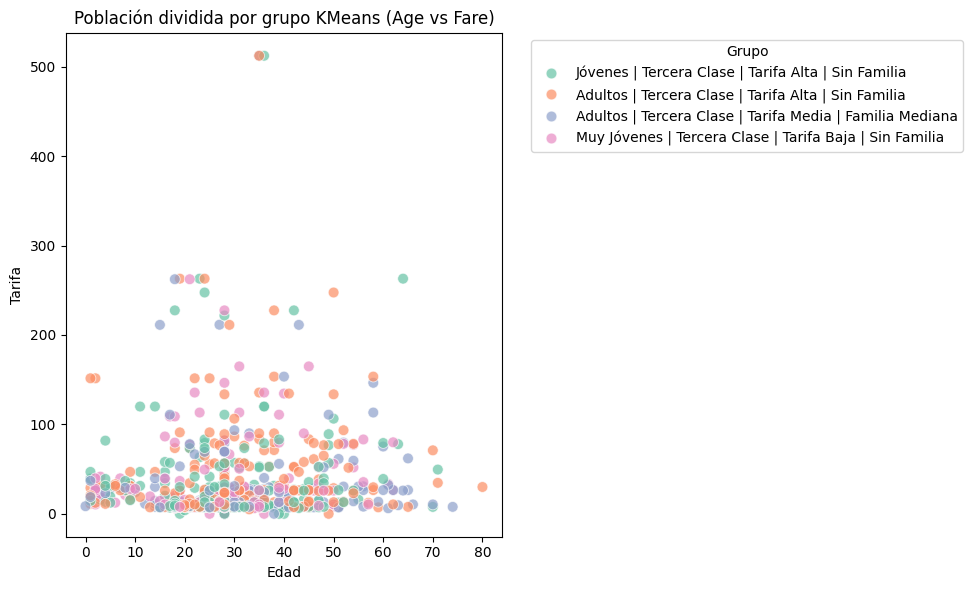

In [34]:
# Visualización de los puntos de la población divididos por grupo (ClusterNameDiff) usando Age vs Fare
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='ClusterNameDiff', data=df_kmeans, palette='Set2', alpha=0.7, s=60)
plt.title('Población dividida por grupo KMeans (Age vs Fare)')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.legend(title='Grupo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

No se puede ver una gráfica fácil de apreciar con las variables que tenemos, por lo que resulta útil aplicar el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad. PCA transforma las variables originales en nuevas variables, que no están correlacionadas entre sí y que capturan la mayor cantidad de información posible.

Al reducir los datos a dos componentes principales,ese puedo visualizar los clusters generados por KMeans en un gráfico 2D. Esto permite ver de forma clara cómo se agrupan los datos y comparar los diferentes grupos de manera sencilla. En resumen, cada componente principal es una nueva variable que me permite visualizar patrones y agrupaciones de manera más sencilla, facilitando la interpretación de los resultados.

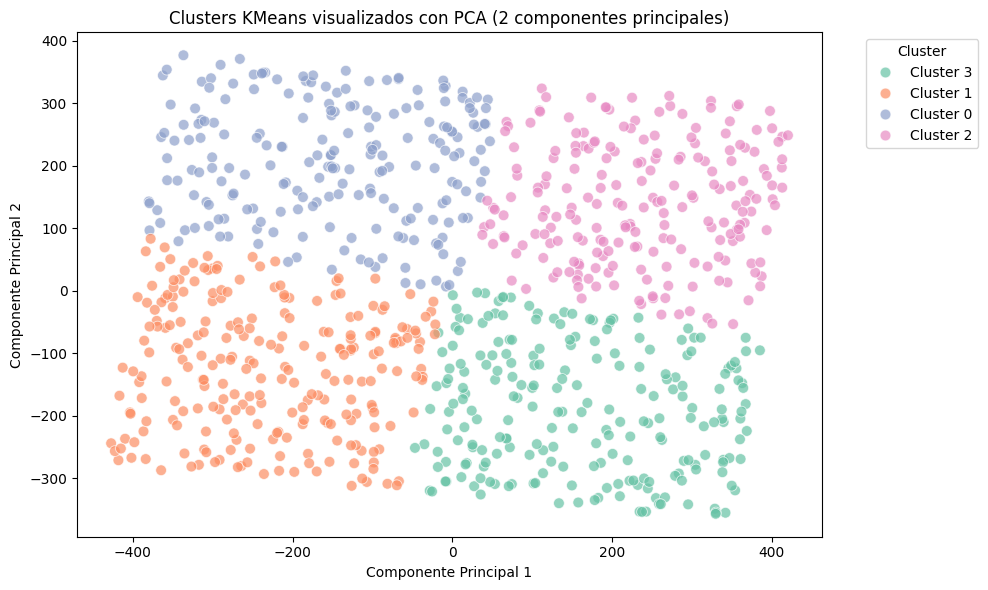

In [35]:
# PCA y visualización de los clusters KMeans usando los componentes principales
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Usar el mismo df_kmeans y X_kmeans (ya codificado y sin nulos)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_kmeans)

# Crear DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_kmeans['Cluster']

# Crear columna con nombre tipo 'Cluster 0', 'Cluster 1', ...
df_pca['ClusterLabel'] = df_pca['Cluster'].apply(lambda x: f'Cluster {x}')

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='ClusterLabel', data=df_pca, palette='Set2', alpha=0.7, s=60)
plt.title('Clusters KMeans visualizados con PCA (2 componentes principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Modelo completo VS varios modelos

In [36]:
# Calcular accuracy de Random Forest por cada cluster y mostrar en orden (sin redondear los dígitos)
results_cluster = {}
for cluster_id in sorted(df_kmeans['Cluster'].unique()):
    df_cluster = df_kmeans[df_kmeans['Cluster'] == cluster_id]
    X_cluster = df_cluster[features].fillna(0)
    y_cluster = df_cluster['Survived']
    for col in ['Sex', 'Embarked', 'FirstName', 'LastName']:
        if col in X_cluster.columns:
            X_cluster[col] = X_cluster[col].astype('category').cat.codes
    if len(df_cluster) > 10:  # Evitar clusters muy pequeños
        X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=42)
        model_c = RandomForestClassifier(n_estimators=50, random_state=42)
        model_c.fit(X_train_c, y_train_c)
        y_pred_c = model_c.predict(X_test_c)
        acc_c = accuracy_score(y_test_c, y_pred_c)
        results_cluster[cluster_id] = acc_c
    else:
        results_cluster[cluster_id] = None  # O puedes poner np.nan

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'HasCabin', 'FirstName', 'LastName']
X_full = df_kmeans[features].fillna(0)
y_full = df_kmeans['Survived']
for col in ['Sex', 'Embarked', 'FirstName', 'LastName']:
    if col in X_full.columns:
        X_full[col] = X_full[col].astype('category').cat.codes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)
model_full = RandomForestClassifier(n_estimators=50, random_state=42)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)
print(f'Accuracy del modelo Random Forest en el dataset completo: {acc_full}')
print('Comparación con accuracy por cluster:')
for cluster_id in sorted(results_cluster.keys()):
    v = results_cluster[cluster_id]
    if v is not None:
        print(f'Cluster {cluster_id}: {v}')
    else:
        print(f'Cluster {cluster_id}: No hay suficientes datos para calcular accuracy')

Accuracy del modelo Random Forest en el dataset completo: 0.8208955223880597
Comparación con accuracy por cluster:
Cluster 0: 0.7142857142857143
Cluster 1: 0.6756756756756757
Cluster 2: 0.8307692307692308
Cluster 3: 0.9264705882352942


In [37]:
# Calcular el promedio de accuracy de los clusters (solo valores numéricos, ignorando None)
import numpy as np
acc_values = [v for v in results_cluster.values() if isinstance(v, (int, float, np.float64, np.float32)) and v is not None]
if acc_values:
    avg_acc = np.mean(acc_values)
    print(f'Promedio de accuracy de los clusters: {avg_acc:.4f}')
else:
    print('No hay valores numéricos de accuracy para calcular el promedio.')

Promedio de accuracy de los clusters: 0.7868


In [38]:
# KFold cross-validation para Random Forest (global y por cluster)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'HasCabin', 'FirstName', 'LastName']
df_encoded = df.copy()
for col in ['Sex', 'Embarked', 'FirstName', 'LastName']:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

X_full = df_encoded[features].fillna(0)
y_full = df_encoded['Survived']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=50, random_state=42)
scores_full = cross_val_score(model, X_full, y_full, cv=kf, scoring='accuracy')

# Guardar resultados en una lista para imprimir solo una vez
output_lines = []
output_lines.append(f'Random Forest completo: Media={np.mean(scores_full):.4f}, Std={np.std(scores_full):.4f}')

if 'Cluster' in df_kmeans.columns:
    cluster_results = {}
    for cluster_id in sorted(df_kmeans['Cluster'].unique()):
        df_cluster = df_kmeans[df_kmeans['Cluster'] == cluster_id]
        X_cluster = df_cluster[features].fillna(0)
        y_cluster = df_cluster['Survived']
        for col in ['Sex', 'Embarked', 'FirstName', 'LastName']:
            if col in X_cluster.columns:
                X_cluster[col] = X_cluster[col].astype('category').cat.codes
        if len(df_cluster) > 10:
            scores_cluster = cross_val_score(model, X_cluster, y_cluster, cv=kf, scoring='accuracy')
            cluster_results[cluster_id] = (np.mean(scores_cluster), np.std(scores_cluster))
        else:
            cluster_results[cluster_id] = None
    for cluster_id, res in cluster_results.items():
        if res is not None:
            output_lines.append(f'Cluster {cluster_id}: Media={res[0]:.4f}, Std={res[1]:.4f}')
        else:
            output_lines.append(f'Cluster {cluster_id}: No hay suficientes datos para KFold')

# Imprimir todos los resultados juntos, solo una vez
for line in output_lines:
    print(line)

Random Forest completo: Media=0.8316, Std=0.0236
Cluster 0: Media=0.8088, Std=0.0616
Cluster 1: Media=0.7707, Std=0.0846
Cluster 2: Media=0.8270, Std=0.0193
Cluster 3: Media=0.8262, Std=0.0645


In [39]:
# Calcular el promedio de la media y el promedio del std de accuracy de los clusters (KFold)
import numpy as np
media_values = [v[0] for v in cluster_results.values() if isinstance(v, tuple) and v is not None]
std_values = [v[1] for v in cluster_results.values() if isinstance(v, tuple) and v is not None]

if media_values:
    avg_media = np.mean(media_values)
    print(f'Promedio de la media de accuracy de los clusters (KFold): {avg_media:.4f}')
else:
    print('No hay valores de media para calcular el promedio.')

if std_values:
    avg_std = np.mean(std_values)
    print(f'Promedio del std de accuracy de los clusters (KFold): {avg_std:.4f}')
else:
    print('No hay valores de std para calcular el promedio.')

Promedio de la media de accuracy de los clusters (KFold): 0.8082
Promedio del std de accuracy de los clusters (KFold): 0.0575


### Modelo con número de cluster

In [40]:
# Modelo usando los features originales + el cluster como nueva componente principal
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Usar el DataFrame df_kmeans, que ya tiene la columna 'Cluster'
features_plus_cluster = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'HasCabin', 'FirstName', 'LastName', 'Cluster']
df_plus_cluster = df_kmeans.copy()
for col in ['Sex', 'Embarked', 'FirstName', 'LastName']:
    if col in df_plus_cluster.columns:
        df_plus_cluster[col] = df_plus_cluster[col].astype('category').cat.codes

X_plus_cluster = df_plus_cluster[features_plus_cluster].fillna(0)
y_plus_cluster = df_plus_cluster['Survived']

X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(X_plus_cluster, y_plus_cluster, test_size=0.3, random_state=42)
model_plus_cluster = RandomForestClassifier(n_estimators=50, random_state=42)
model_plus_cluster.fit(X_train_pc, y_train_pc)
y_pred_pc = model_plus_cluster.predict(X_test_pc)
acc_pc = accuracy_score(y_test_pc, y_pred_pc)
print(f'Accuracy del modelo usando el cluster como nueva componente principal: {acc_pc:.4f}')

Accuracy del modelo usando el cluster como nueva componente principal: 0.8134


In [41]:
# Comparar el accuracy del modelo original vs modelo con cluster como feature
import pandas as pd

# Asegurarse de que acc_full y acc_pc estén definidos (accuracy del modelo original y del modelo con cluster)
try:
    data = {
        'Modelo': ['Random Forest original', 'Random Forest + Cluster'] ,
        'Accuracy': [acc_full, acc_pc]
    }
    df_comp = pd.DataFrame(data)
    display(df_comp)
except NameError:
    print('Asegúrate de haber ejecutado las celdas que calculan acc_full y acc_pc.')

,Modelo,Accuracy
0,Random Forest original,0.820896
1,Random Forest + Cluster,0.813433
